#### 1. Install Library

In [139]:
# %pip install openai python-dotenv

#### 2. Import Library

In [140]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from openai import OpenAI

#### 3. Integrasikan dengan OpenAI

In [141]:
# Load environment variables from .env file
load_dotenv()

# Get NAGA AI API key from environment variable
my_api = os.getenv("NAGA_API_KEY")

# Initialize OpenAI API
client = OpenAI(api_key=my_api,
                base_url='https://api.naga.ac/v1'
                )

#### 4. Load dataset

In [142]:
sales_data = pd.read_csv("dataset_penjualan.csv")

#### 5. Function

In [143]:
def generate(prompt, model="gpt-3.5-turbo"):
    response = client.chat.completions.create(
        model=model,
                messages=[
            {
                "role": "user",
                "content": prompt,
            },
        ],
        temperature=0.5,
        max_tokens=1000
    )

    return response.choices[0].message.content

#### 6. Prompt 1: Analisis Tren Penjualan

In [144]:
prompt_1 = """
Analisis tren penjualan selama bulan April 2024. Apa yang dapat Anda simpulkan dari pola penjualan harian?
"""
response_1 = generate(prompt_1 + sales_data.to_csv(index=False), model="gpt-3.5-turbo")

print("Insight dari Analisis Tren Penjualan:")
print(response_1)

Insight dari Analisis Tren Penjualan:
Dari data penjualan di bulan April 2024, dapat dilihat bahwa pola penjualan harian cenderung bervariasi. Namun, terdapat beberapa pola yang dapat diidentifikasi:

1. Penjualan pada tanggal 4, 10, dan 25 memiliki jumlah penjualan yang tinggi, yang kemungkinan disebabkan oleh adanya peningkatan permintaan pada produk kategori Food.
2. Penjualan pada tanggal 6, 9, 12, dan 27 cenderung lebih rendah, yang mungkin disebabkan oleh kurangnya minat pembeli pada produk kategori Clothing.
3. Penjualan pada tanggal 15 memiliki jumlah penjualan yang tinggi, yang kemungkinan disebabkan oleh adanya peningkatan permintaan pada produk kategori Clothing.
4. Penjualan pada tanggal 13 memiliki jumlah penjualan yang rendah, yang mungkin disebabkan oleh kurangnya minat pembeli pada produk kategori Food.

Dari pola penjualan harian tersebut, dapat disimpulkan bahwa permintaan konsumen cenderung bervariasi berdasarkan kategori produk, dan dapat menjadi acuan bagi strategi

#### 7. Prompt 2: Segmentasi Pelanggan

In [145]:
prompt_2 = """
Lakukan segmentasi pelanggan berdasarkan jumlah pembelian dan kategori produk yang dibeli. Apakah Anda dapat mengidentifikasi pola pembelian yang konsisten dari kelompok pelanggan tertentu?
"""

response_2 = generate(prompt_2 + sales_data.to_csv(index=False), model="gpt-3.5-turbo")

print("Insight dari Segmentasi Pelanggan:")
print(response_2)

Insight dari Segmentasi Pelanggan:
Dari data penjualan di atas, kita dapat melakukan segmentasi pelanggan berdasarkan jumlah pembelian dan kategori produk yang dibeli. Misalnya, kita dapat mengidentifikasi kelompok pelanggan yang cenderung membeli produk elektronik dengan jumlah pembelian yang konsisten, atau kelompok pelanggan yang cenderung membeli pakaian dengan jumlah pembelian yang konsisten.

Dari data yang diberikan, kita dapat melihat bahwa ada pola pembelian yang konsisten dari kelompok pelanggan tertentu. Misalnya, pelanggan yang cenderung membeli produk elektronik memiliki jumlah pembelian yang relatif tinggi dan konsisten di sekitar 50-60 unit, sementara pelanggan yang cenderung membeli pakaian memiliki jumlah pembelian yang relatif rendah di sekitar 30-40 unit.

Dengan melakukan analisis lebih lanjut terhadap data ini, kita dapat mengidentifikasi pola pembelian yang konsisten dari kelompok pelanggan tertentu dan mengoptimalkan strategi pemasaran atau penawaran produk untuk

#### 8. Prompt 3: Prediksi Penjualan

In [148]:
prompt_3 = """
Gunakan data historis untuk memprediksi penjualan pada tanggal-tanggal tertentu di masa depan. Bagaimana performa prediksi penjualan Anda dibandingkan dengan realitas?
"""

response_3 = generate(prompt_3 + sales_data.to_csv(index=False), model="gpt-3.5-turbo")

print("Insight dari Prediksi Penjualan:")
print(response_3)

Insight dari Prediksi Penjualan:
Dengan menggunakan data historis di atas, kita dapat memprediksi penjualan pada tanggal-tanggal tertentu di masa depan dengan menggunakan metode analisis data seperti regresi linier atau time series forecasting. Setelah melakukan prediksi, kita dapat membandingkan hasil prediksi dengan realitas untuk melihat seberapa akurat model prediksi yang telah kita buat.

Performa prediksi penjualan dapat dinilai berdasarkan seberapa dekat nilai prediksi dengan nilai aktual penjualan. Jika hasil prediksi memiliki selisih yang kecil dengan realitas, maka dapat dikatakan bahwa model prediksi tersebut memiliki performa yang baik. Namun, jika hasil prediksi memiliki selisih yang besar dengan realitas, maka model tersebut perlu diperbaiki atau disesuaikan dengan data yang lebih akurat.

Dalam kasus ini, performa prediksi penjualan dapat dievaluasi dengan menghitung tingkat akurasi atau error antara nilai prediksi dan nilai aktual penjualan. Jika tingkat akurasi tinggi,

#### 9. Visualisasi data penjualan menggunakan Matplotlib

<Figure size 1000x600 with 0 Axes>

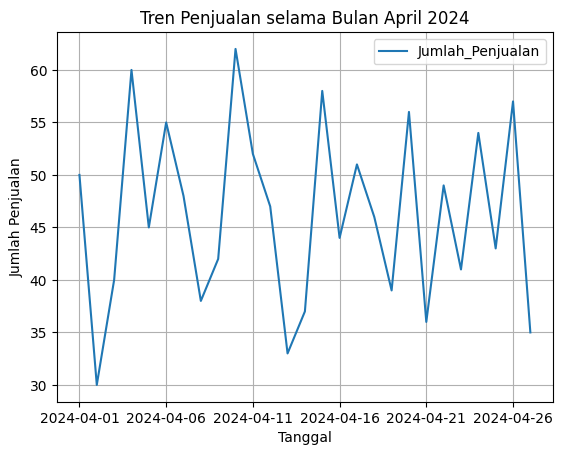

In [147]:
plt.figure(figsize=(10, 6))
sales_data.plot(x='Tanggal', y='Jumlah_Penjualan', kind='line')
plt.title('Tren Penjualan selama Bulan April 2024')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.show()

#### 10. Visualisasi data jumlah pembelian berdasarkan kategori produk (segmentasi pelanggan)

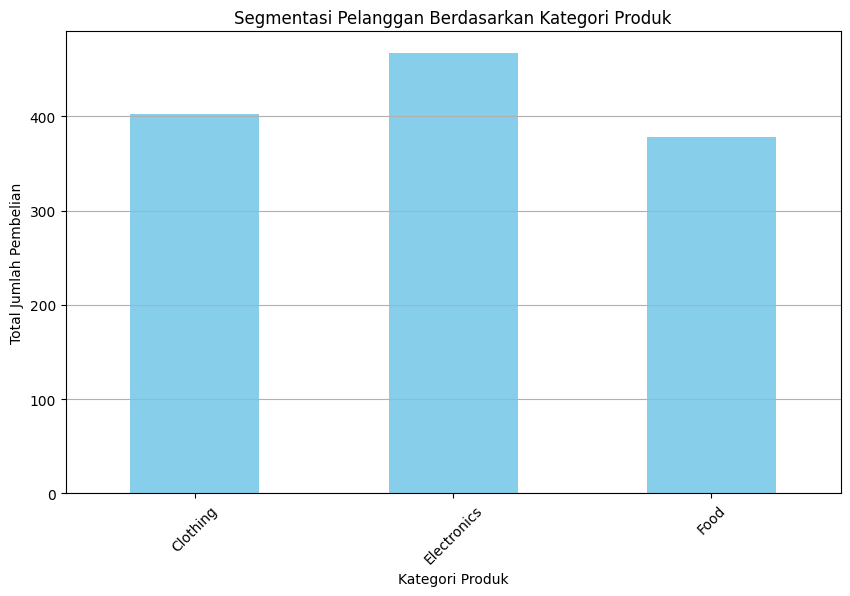

In [154]:
plt.figure(figsize=(10, 6))
sales_data.groupby('Kategori_Produk')['Jumlah_Penjualan'].sum().plot(kind='bar', color='skyblue')

plt.title('Segmentasi Pelanggan Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Jumlah Pembelian')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### 11.  visualisasi data prediksi penjualan

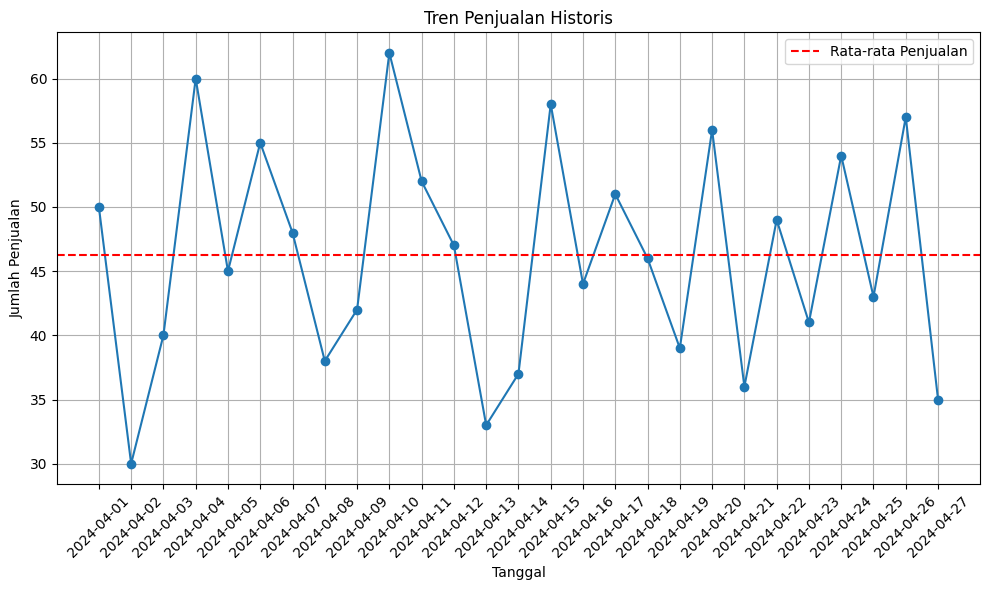

In [155]:
# Visualisasi tren penjualan historis
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Tanggal'], sales_data['Jumlah_Penjualan'], marker='o', linestyle='-')
plt.title('Tren Penjualan Historis')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)

# Proyeksi sederhana (misalnya, rata-rata penjualan)
mean_sales = sales_data['Jumlah_Penjualan'].mean()
plt.axhline(y=mean_sales, color='r', linestyle='--', label='Rata-rata Penjualan')
plt.legend()

plt.xticks(rotation=45)  # Untuk memutar label tanggal jika diperlukan
plt.tight_layout()  # Untuk memastikan label tidak tumpang tindih
plt.show()